# Basic Neural Network
This is going to just be a basic model with 205 inputs, 1 output, N hidden layers

In [66]:
# read in packages
import torch
from torch import nn
from torch.utils.data import DataLoader # wraps an iterable around the Dataset
from torchvision import datasets #  stores the samples and their corresponding labels
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import os
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
import time

In [82]:
# Dataloader class
import pandas as pd
from torchvision.transforms import ToTensor, Lambda
# Creating a custom dataloader
class Sample_Loader(Dataset):
    def __init__(self, data: pd.DataFrame, transform=None, target_transform=None, no_labels = False) -> None:
        self.data = data
        self.size: int = len(self.data)
        self.transform = transform
        self.target_transform = target_transform
        self.nolabel = no_labels

    def __len__(self) -> int:
        return self.size
    
    def __getitem__(self, index: int):
        row = self.data.iloc[index]
        data = torch.as_tensor(row.iloc[:205],dtype=torch.float32)
        if self.nolabel: 
            label = None
        else:
            label = int(row["label"])

        if (self.transform):
            data = self.transform(data)
        if (self.target_transform):
            label = self.target_transform(label)

        return data, label

one_hot_transform = Lambda(lambda y: torch.zeros(5, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))


In [68]:
# Create data loaders
from sklearn.model_selection import train_test_split
data = pd.read_csv(r"/Users/jojog/Library/CloudStorage/OneDrive-Personal/Documents/GitHub/class/neural_networks_from_scratch/projects/Joseph Gregory/data/train.csv")
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

test_dataset = Sample_Loader(
    test_df, 
    target_transform = one_hot_transform
)
train_dataset = Sample_Loader(
    train_df,
    target_transform = one_hot_transform)
data.describe()

# print(train_dataset[10])

,id,f000,f001,f002,f003,f004,f005,f006,f007,f008,...,f196,f197,f198,f199,f200,f201,f202,f203,f204,label
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,3999.50000,0.805018,-0.011528,-0.000932,-0.002528,-0.484048,-0.014945,0.018562,0.004851,-0.013170,...,0.006943,0.588702,-0.001693,1.217971,-0.026956,-0.102806,-0.008272,0.606423,0.507875,1.005875
std,2309.54541,14.705159,1.010357,1.013142,0.999375,3.692672,0.988951,1.012294,0.994205,0.997774,...,1.003444,3.652461,1.003413,15.373700,3.699250,13.711122,0.705233,0.446092,0.499969,1.228425
min,0.00000,-56.820789,-3.506557,-3.515218,-4.075793,-14.780168,-3.642797,-3.843296,-3.420248,-3.837282,...,-3.620740,-15.421696,-3.960209,-55.213184,-27.713529,-91.791919,-1.000000,-0.999741,0.000000,0.000000
25%,1999.75000,-8.954983,-0.706758,-0.690775,-0.675032,-2.985061,-0.671148,-0.651060,-0.667186,-0.694966,...,-0.659877,-1.813411,-0.666177,-9.402129,-1.411645,-5.090678,-0.708932,0.401395,0.000000,0.000000
50%,3999.50000,1.063698,-0.007055,0.006410,-0.005960,-0.512002,-0.029224,0.013172,0.017679,-0.007590,...,-0.000810,0.647237,-0.001061,1.073701,-0.024336,-0.022075,-0.022344,0.781604,1.000000,1.000000
75%,5999.25000,10.897224,0.697146,0.699743,0.678151,2.072359,0.655039,0.697281,0.685491,0.653621,...,0.685479,3.086251,0.674673,11.672657,1.304292,4.746585,0.690990,0.948868,1.000000,2.000000
max,7999.00000,53.514587,3.616210,3.610289,3.521402,15.842759,3.646581,3.512160,3.351662,3.325671,...,3.977687,13.670274,3.649114,59.168489,28.904723,96.238884,0.999998,1.000000,1.000000,4.000000


In [69]:
# Choose correct device
device = torch.device("mps") if torch.mps.is_available() else "cpu"
# device = "cpu"
print(f"Using {device} device")

Using mps device


In [70]:
# Define model and move it to correct device
class lkRELU_Model(nn.Module):
    def __init__(self):
        super(lkRELU_Model, self).__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(205, 128),
            nn.ELU(),
            nn.Linear(128, 128),
            nn.ELU(),
            nn.Linear(128, 128),
            nn.ELU(),
            nn.Linear(128, 64),
            nn.ELU(),
            nn.Linear(64, 32),
            nn.ELU(),
            nn.Linear(32, 5)
            # nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.linear_stack(x)

model = lkRELU_Model().to(device)
print(model)

lkRELU_Model(
  (linear_stack): Sequential(
    (0): Linear(in_features=205, out_features=128, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ELU(alpha=1.0)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ELU(alpha=1.0)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): ELU(alpha=1.0)
    (10): Linear(in_features=32, out_features=5, bias=True)
  )
)


In [71]:
# Print Model Structure
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()}, {param.type()} \n")

Model structure: lkRELU_Model(
  (linear_stack): Sequential(
    (0): Linear(in_features=205, out_features=128, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ELU(alpha=1.0)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ELU(alpha=1.0)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): ELU(alpha=1.0)
    (10): Linear(in_features=32, out_features=5, bias=True)
  )
)


Layer: linear_stack.0.weight | Size: torch.Size([128, 205]), torch.mps.FloatTensor 

Layer: linear_stack.0.bias | Size: torch.Size([128]), torch.mps.FloatTensor 

Layer: linear_stack.2.weight | Size: torch.Size([128, 128]), torch.mps.FloatTensor 

Layer: linear_stack.2.bias | Size: torch.Size([128]), torch.mps.FloatTensor 

Layer: linear_stack.4.weight | Size: torch.Size([128, 128]), torch.mps.FloatTensor 

Layer: linear_stack.4.bias | Size

# Gradient loss time!
and batching

In [72]:
# Hyper parameters and dataloader
learning_rate = 1e-3
batch_size = 8000
epochs = 5
# Loss function
loss_fn = nn.CrossEntropyLoss()
#Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
for X, y in train_dataloader:
    print(f"Shape of X: {X.shape}")
    break
    

/var/folders/wj/bq67gt8n7qx2_vx06z0_94hw0000gn/T/ipykernel_44683/765190033.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.as_tensor(row.iloc[:205],dtype=torch.float32)


Shape of X: torch.Size([6400, 205])


In [73]:
# Training loop functions
from numpy import average


def train_loop(dataloader, model: lkRELU_Model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    losses = []
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
            
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y.argmax(1)).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /= size
    # print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return 100*correct, test_loss

In [74]:
# Training Loop function

def run_training(epochs: int, model, learning_rate: float, train_dataloader, test_dataloader, ):
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.5)
    testing_losses = []
    for t in range(epochs):
        # print(f"Epoch {t+1}\n-------------------------------")
        train_loop(train_dataloader, model, loss_fn, optimizer)
        accuracy, loss = test_loop(test_dataloader, model, loss_fn)
        testing_losses.append(loss)
        scheduler.step()
        # print(t)
    clear_output(wait=True)
    plt.figure(figsize=(10, 5))
    plt.plot(testing_losses, label='Training Loss')
    # plt.show()
    plt.title(f"Epoch {t}")
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    print(testing_losses)
    print("Done!")

In [75]:
# Models and running
class small_model(nn.Module):
    def __init__(self, activation_function):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(205, 128),
            activation_function(),
            nn.Linear(128, 64),
            activation_function(),
            nn.Linear(64, 32),
            activation_function(),
            nn.Linear(32, 5),
            activation_function()
        )
    def forward(self, x):
        return self.linear_stack(x)
    
class huge_model(nn.Module):
    def __init__(self, activation_function):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(205, 1024),
            activation_function(),
            nn.Linear(1024, 512),
            activation_function(),
            nn.Linear(512, 256),
            activation_function(),
            nn.Linear(256, 64),
            activation_function(),
            nn.Linear(64, 32),
            activation_function(),
            nn.Linear(32, 5),
            activation_function()
        )
    def forward(self, x):
        return self.linear_stack(x)
    
class singlesize_model(nn.Module):
    def __init__(self, activation_function):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(205, 205),
            activation_function(),
            nn.Linear(205, 205),
            activation_function(),
            nn.Linear(205, 205),
            activation_function(),
            nn.Linear(205, 5),
            activation_function()
        )
    def forward(self, x):
        return self.linear_stack(x)
    
class many_layers_model(nn.Module):
    def __init__(self, activation_function):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(205, 205),
            activation_function(),
            nn.Linear(205, 205),
            activation_function(),
            nn.Linear(205, 205),
            activation_function(),
            nn.Linear(205, 205),
            activation_function(),
            nn.Linear(205, 205),
            activation_function(),
            nn.Linear(205, 205),
            activation_function(),
            nn.Linear(205, 128),
            activation_function(),
            nn.Linear(128, 64),
            activation_function(),
            nn.Linear(64, 32),
            activation_function(),
            nn.Linear(32, 5),
            activation_function()
        )
    def forward(self, x):
        return self.linear_stack(x)

# init models
model_nnRELU = small_model(nn.ReLU).to(device)
model_nnLkRELU = small_model(nn.LeakyReLU).to(device)
model_nnHUGE = huge_model(nn.LeakyReLU).to(device)
model_single_size = singlesize_model(nn.LeakyReLU).to(device)
model_many_layers = many_layers_model(nn.LeakyReLU).to(device)
num_epochs = 100
learning_rate = 1e-4

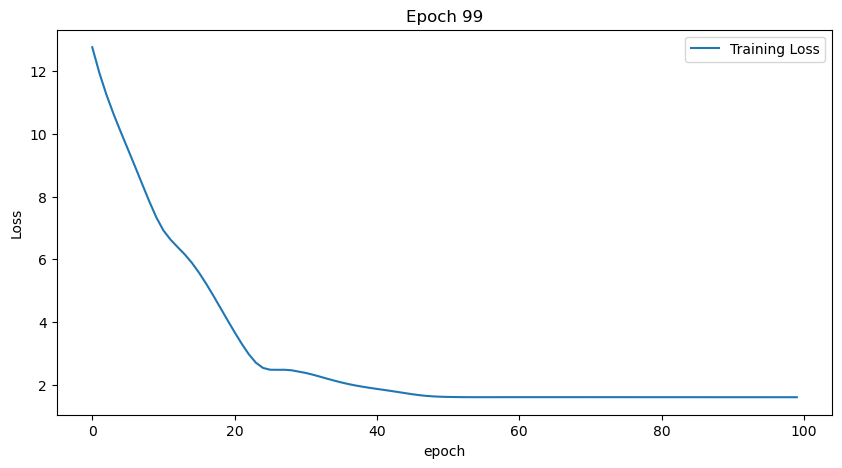

[12.760493278503418, 11.940478324890137, 11.242558479309082, 10.628514289855957, 10.063608169555664, 9.516448020935059, 8.966059684753418, 8.408358573913574, 7.855309963226318, 7.339621067047119, 6.92117977142334, 6.628910064697266, 6.390448093414307, 6.157635688781738, 5.889904975891113, 5.576571464538574, 5.226207256317139, 4.849726676940918, 4.458120346069336, 4.065363883972168, 3.680535316467285, 3.311516046524048, 2.9758691787719727, 2.7055938243865967, 2.539679527282715, 2.482832431793213, 2.4805922508239746, 2.482132911682129, 2.465771198272705, 2.423046350479126, 2.381167411804199, 2.3245656490325928, 2.262070655822754, 2.1981191635131836, 2.135932207107544, 2.0781314373016357, 2.0262246131896973, 1.980696678161621, 1.94085693359375, 1.9051960706710815, 1.8718655109405518, 1.839164137840271, 1.8057570457458496, 1.7710907459259033, 1.7357285022735596, 1.7015571594238281, 1.6716930866241455, 1.6483089923858643, 1.6320866346359253, 1.621951937675476, 1.6160836219787598, 1.61233520

In [76]:
# Running
run_training(num_epochs, model_nnRELU, learning_rate, train_dataloader, test_dataloader)

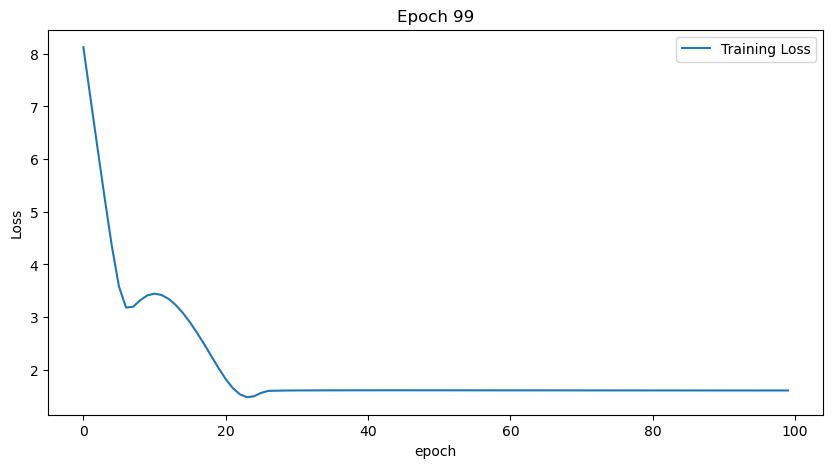

[8.12510871887207, 7.158206939697266, 6.196602821350098, 5.253714561462402, 4.348363399505615, 3.578908681869507, 3.179811716079712, 3.195894479751587, 3.3216519355773926, 3.412479877471924, 3.4441299438476562, 3.4184484481811523, 3.34317684173584, 3.226071834564209, 3.07456111907959, 2.8953423500061035, 2.6945855617523193, 2.478454351425171, 2.253925085067749, 2.03017520904541, 1.821586012840271, 1.6497830152511597, 1.531325340270996, 1.4770663976669312, 1.4962316751480103, 1.560927152633667, 1.597224473953247, 1.600539207458496, 1.6034640073776245, 1.6051455736160278, 1.605684757232666, 1.6061944961547852, 1.6066606044769287, 1.6070626974105835, 1.607385516166687, 1.6076769828796387, 1.6079293489456177, 1.6081448793411255, 1.6083266735076904, 1.6084764003753662, 1.6085931062698364, 1.608673095703125, 1.6087266206741333, 1.6087573766708374, 1.608766794204712, 1.6087566614151, 1.6087287664413452, 1.6086840629577637, 1.6086269617080688, 1.6085585355758667, 1.6084814071655273, 1.60839498

In [77]:
# Running
model_nnLkRELU = small_model(nn.LeakyReLU).to(device)
run_training(num_epochs, model_nnLkRELU, learning_rate, train_dataloader, test_dataloader)

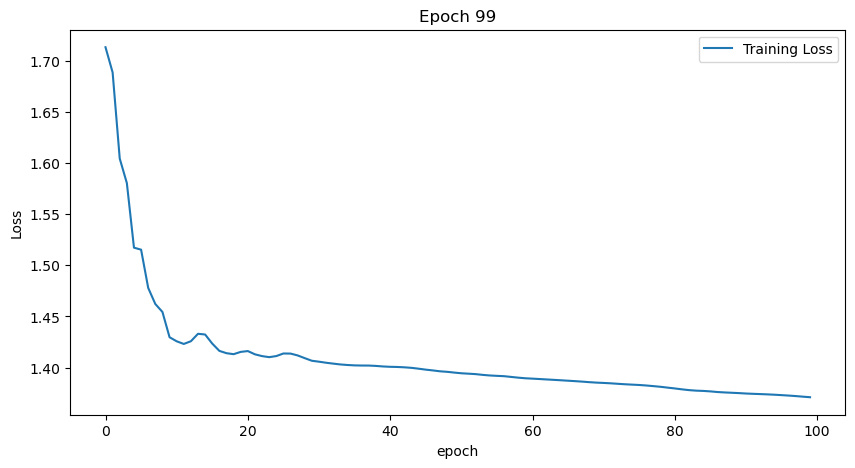

[1.7130972146987915, 1.6884428262710571, 1.604250431060791, 1.5802857875823975, 1.5171844959259033, 1.5152227878570557, 1.4778399467468262, 1.4621102809906006, 1.4543511867523193, 1.4296460151672363, 1.4256646633148193, 1.4230693578720093, 1.4257372617721558, 1.433009386062622, 1.4322960376739502, 1.423416018486023, 1.4163016080856323, 1.414033055305481, 1.4130804538726807, 1.4153064489364624, 1.4161111116409302, 1.4129323959350586, 1.4111865758895874, 1.4101662635803223, 1.4112274646759033, 1.4137463569641113, 1.413655400276184, 1.4118460416793823, 1.4091763496398926, 1.4066330194473267, 1.4057273864746094, 1.4047049283981323, 1.403842806816101, 1.4030368328094482, 1.402502417564392, 1.4021203517913818, 1.401979923248291, 1.4019503593444824, 1.4015957117080688, 1.4010696411132812, 1.400732159614563, 1.4005693197250366, 1.400234341621399, 1.3997153043746948, 1.398882269859314, 1.3979548215866089, 1.3971971273422241, 1.3963373899459839, 1.3958362340927124, 1.395092487335205, 1.394420742

In [78]:
# Running
run_training(num_epochs, model_nnHUGE, learning_rate, train_dataloader, test_dataloader)

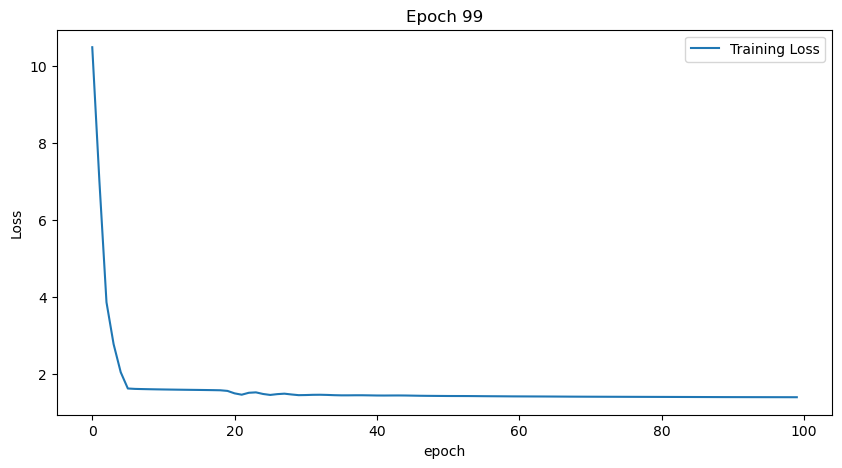

[10.48034954071045, 7.013101577758789, 3.853739023208618, 2.766289710998535, 2.0368170738220215, 1.6141427755355835, 1.6035912036895752, 1.599124789237976, 1.5951956510543823, 1.5917563438415527, 1.5887212753295898, 1.5859403610229492, 1.5833474397659302, 1.5809251070022583, 1.5786237716674805, 1.5764105319976807, 1.5739877223968506, 1.5712461471557617, 1.5676480531692505, 1.5514171123504639, 1.4876694679260254, 1.4529949426651, 1.5027438402175903, 1.5134185552597046, 1.4716812372207642, 1.4465523958206177, 1.4675809144973755, 1.4795078039169312, 1.4586752653121948, 1.4408669471740723, 1.443845510482788, 1.449705958366394, 1.451480507850647, 1.4471267461776733, 1.440292239189148, 1.4360990524291992, 1.4363213777542114, 1.438177466392517, 1.438046932220459, 1.435213327407837, 1.4321438074111938, 1.431266188621521, 1.432430624961853, 1.433237910270691, 1.4318363666534424, 1.4286259412765503, 1.4253630638122559, 1.4232150316238403, 1.4217900037765503, 1.4203687906265259, 1.418976783752441

In [79]:
# Running
model_single_size = singlesize_model(nn.LeakyReLU).to(device)
run_training(num_epochs, model_single_size, learning_rate, train_dataloader, test_dataloader)

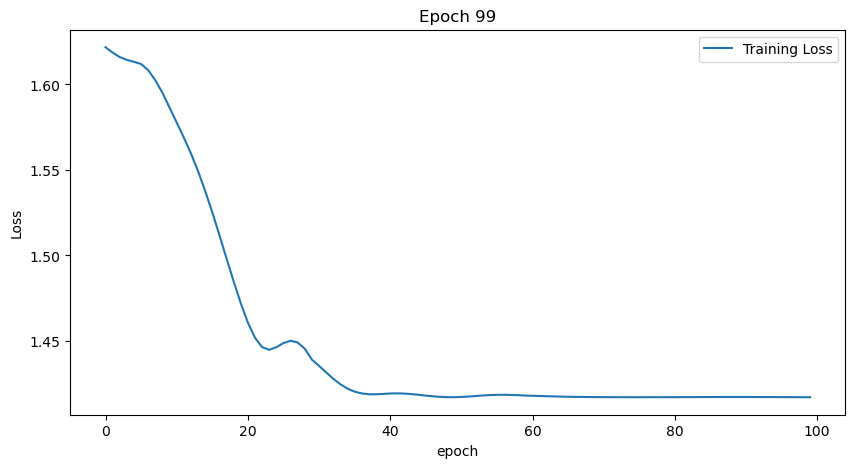

[1.6217297315597534, 1.6185907125473022, 1.6159639358520508, 1.6143088340759277, 1.613203525543213, 1.6119277477264404, 1.6083064079284668, 1.6024279594421387, 1.5951166152954102, 1.5864392518997192, 1.5777779817581177, 1.5689948797225952, 1.5596868991851807, 1.5493535995483398, 1.5377987623214722, 1.5253424644470215, 1.5119720697402954, 1.4983344078063965, 1.484959363937378, 1.472184419631958, 1.4608606100082397, 1.4519457817077637, 1.446476697921753, 1.4448951482772827, 1.446352243423462, 1.4487838745117188, 1.4501858949661255, 1.4491418600082397, 1.4455186128616333, 1.4391753673553467, 1.4355143308639526, 1.4316952228546143, 1.4279606342315674, 1.42472505569458, 1.4222145080566406, 1.4204394817352295, 1.4193710088729858, 1.4189181327819824, 1.4188942909240723, 1.419103980064392, 1.4193376302719116, 1.419419527053833, 1.4193000793457031, 1.4190001487731934, 1.418575644493103, 1.4181280136108398, 1.417712688446045, 1.4173879623413086, 1.417199969291687, 1.417176365852356, 1.4173091650

In [80]:
# Running
run_training(num_epochs, model_many_layers, learning_rate, train_dataloader, test_dataloader)

In [ ]:
# Submission
test_data = pd.read_csv("/Users/jojog/Library/CloudStorage/OneDrive-Personal/Documents/GitHub/class/neural_networks_from_scratch/projects/Joseph Gregory/data/test.csv")
test_loader = Sample_Loader(test_data, no_labels=True)
model_nnHUGE.eval()
predictions = pd.DataFrame(columns=["label"])
for X,y in test_loader:
    X = X.to(device)
    pred = model_many_layers(X)
    predictions.loc[len(predictions)] = [int(pred.cpu().argmax())]
predictions.index.name = 'id'
print(predictions)
predictions.to_csv('submission.csv')

/var/folders/wj/bq67gt8n7qx2_vx06z0_94hw0000gn/T/ipykernel_44683/2454787732.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.as_tensor(row.iloc[:205],dtype=torch.float32)
/var/folders/wj/bq67gt8n7qx2_vx06z0_94hw0000gn/T/ipykernel_44683/2454787732.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.as_tensor(row.iloc[:205],dtype=torch.float32)
/var/folders/wj/bq67gt8n7qx2_vx06z0_94hw0000gn/T/ipykernel_44683/2454787732.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF

      label
id         
0         3
1         3
2         3
3         3
4         3
...     ...
1995      0
1996      0
1997      0
1998      0
1999      0

[2000 rows x 1 columns]


/var/folders/wj/bq67gt8n7qx2_vx06z0_94hw0000gn/T/ipykernel_44683/2454787732.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.as_tensor(row.iloc[:205],dtype=torch.float32)
/var/folders/wj/bq67gt8n7qx2_vx06z0_94hw0000gn/T/ipykernel_44683/2454787732.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = torch.as_tensor(row.iloc[:205],dtype=torch.float32)
/var/folders/wj/bq67gt8n7qx2_vx06z0_94hw0000gn/T/ipykernel_44683/2454787732.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF